<a href="https://colab.research.google.com/github/ALL-Rodrigues/Topicos_Avancados/blob/main/Aula12_16_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decima Segunda aula de topicos avançados.

<br>
SVMs (Support Vector Machine)


*   Dados
*   



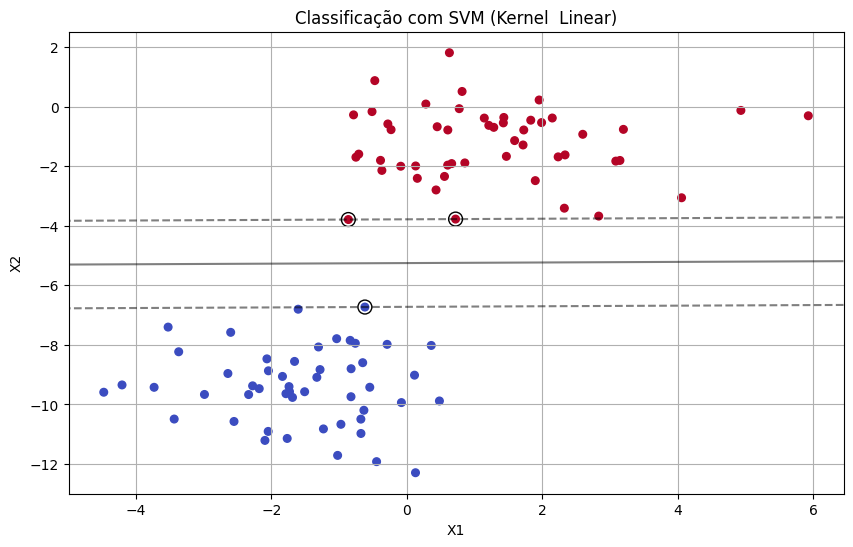

In [2]:
#codigo do primeiro exercicio
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=100, centers=2, random_state=2, cluster_std=1.2)
model = SVC(kernel='linear')
model.fit(X, y)

def plot_svm(model, X, y):
  plt.figure(figsize=(10, 6))

  #plotar os pontos
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

  #ovter os limites do gráfico
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #Criar uma grade para avaliar o modelo
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  #Desenhar o hiperplano e as margens
  plt.contour(XX, YY, Z, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])

  #Destacar os vetores de suporte
  plt.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=100, linewidth=1, facecolors='none', edgecolors='k')

  plt.title("Classificação com SVM (Kernel  Linear)")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.grid(True)
  plt.show()

# 4. Exibir o resulto
plot_svm(model, X, y)

# Arvores de Dados
<br>

### Arvores Binarias
<br>

em uma arvore binaria cada nó só pode ter dois "Filhos" ou distinções. os n[os não necessariamente precisam ter dois nós que surgem dela, alguns tem apenas 1 e alguns nem filhos teram, ele são chamados de nós folhas.
<br>
ele fica buscando abrindo a busca (busca em largura) priocura uma parte de um lado e depois do outro.
<br>
busca em profundidade. busca até o fu=inal de um lado e se não encontrar eçe procura do outro.
<br>

limitações e boas praticas
* Problemas comuns

overfitting

Arvore de decisão.

**o que é random forest?** <br>
random forest é um conjunto de aravores de decisão. cada arvore faz uma predição e a floresta vota no resultado final (maioria no caaso de classoficação).

**Por que é inteligente?** <br>
combina varias arvoreas fracas para formar um modelo forte e robusto. evita overfitting, comum em arvores unicas. aprende padrões complexos sem memorizar os dados.

Vatagens da Random Forest
* alta acuracia
* robusta contra overfitting
* funciona bem com dados faltanes
* pode fazer algo.



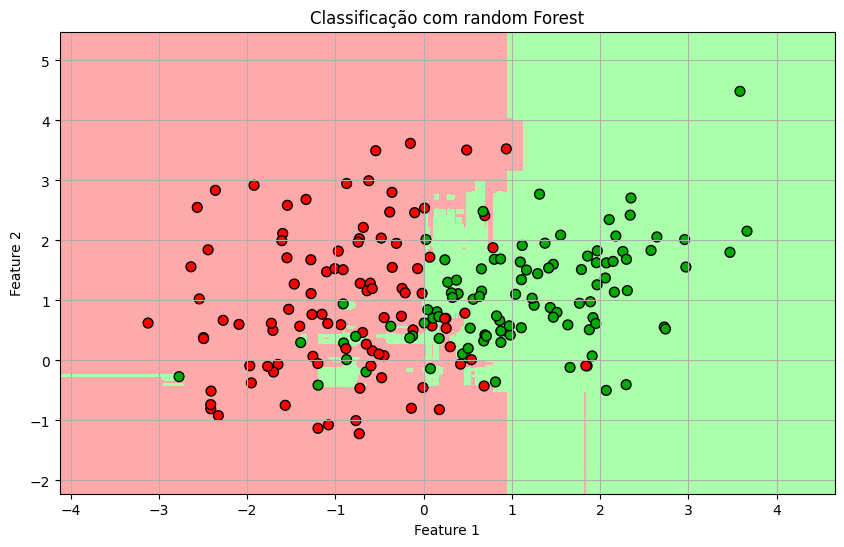

In [19]:
# Código 02
# Random Forest Classifier - exemplo com visualização
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#1 - gerar base de dados sintetica 2D para visualização
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

#2 - craiar e treinar o modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

#3 - função para plotar a fronteira
def plot_decision_boundary(X, y, model, title):
  h = .02 # step size in the mesh
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
  cmap_bold = ListedColormap(['#FF0000', '#00AA00'])
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10, 6))
  plt.contourf(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=50)
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.grid(True)
  plt.show()

plot_decision_boundary(X, y, clf, "Classificação com random Forest")

# rede neural <br>

### tipos de redes neurais.

* percetron : classificação simples.
* mlp (multilayer percetron): varias camadas tipo random forest, colocando cada vez mais arvores.regreão complexa
* CNN (convolutional Neural Network): visão computacional e iaagens
* RNN (recurrent neural netwoek):


### trinamento de uma rede neural
* forward propagation: passa os dados pra frente, calcula a saida.
* calculo dee erro (loss) diferenla entre saida e previst e real
* backpropagation
* não anotei




Acuracia:  0.9722222222222222

Relatorio de classificação:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.92      0.96      0.94        50
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        54
           4       1.00      0.95      0.97        60
           5       0.97      0.95      0.96        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.91      0.95      0.93        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



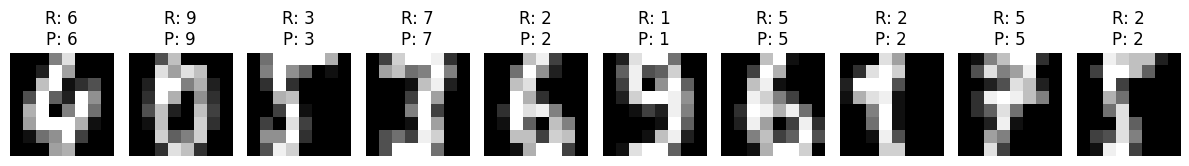

In [30]:
#codigo 03

#redes neurais com base de digitos (0 a 9)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1 - carrefgar a base de dados de dogitos
digits = load_digits()
X, y = digits.data, digits.target

#2 - dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#3 - criar e treinar a rede neural
mpl = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=1)
mpl.fit(X_train, y_train)

#4 - fazer pevisoes
y_pred = mpl.predict(X_test)

# 5 - avaliar o modelo
print( "Acuracia: ", accuracy_score(y_test, y_pred))
print("\nRelatorio de classificação:\n")
print(classification_report(y_test, y_pred))

# 6 - mostrar algumas previsoes com imagens
def plot_predictions(images, labels_true, label_pred, n=10):
  plt.figure(figsize=(12, 4))
  for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"R: {labels_true[i]}\nP: {label_pred[i]}")
    plt.axis('off')
  plt.tight_layout()
  plt.show()

#Exibir as 10 primeiras imagens da base de teste

plot_predictions(digits.images[-len(X_test):], y_test, y_pred)
